## <center> Importing the Dependencies </center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings('ignore')

## <center> Data Collection and Processing </center>

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


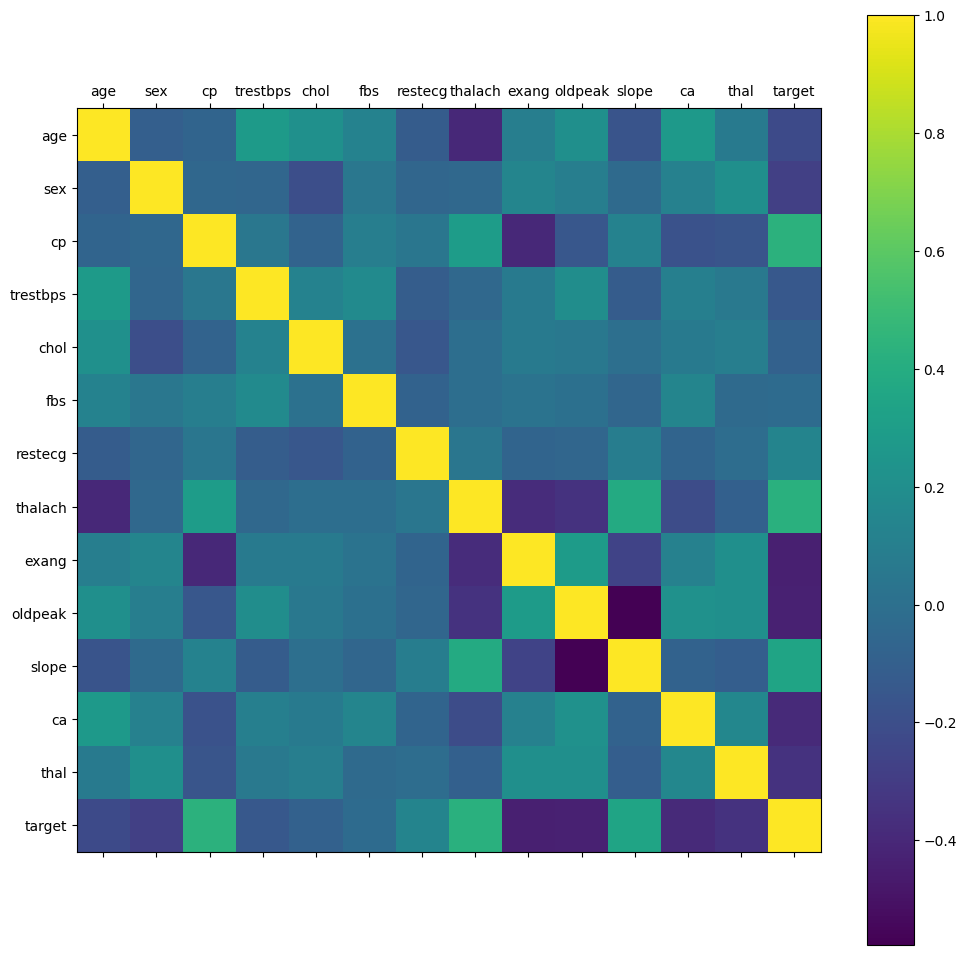

In [ ]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 18,12
plt.matshow(heart_data.corr())
plt.yticks(np.arange(heart_data.shape[1]), heart_data.columns)
plt.xticks(np.arange(heart_data.shape[1]), heart_data.columns)
plt.colorbar()

target
1    165
0    138
Name: count, dtype: int64


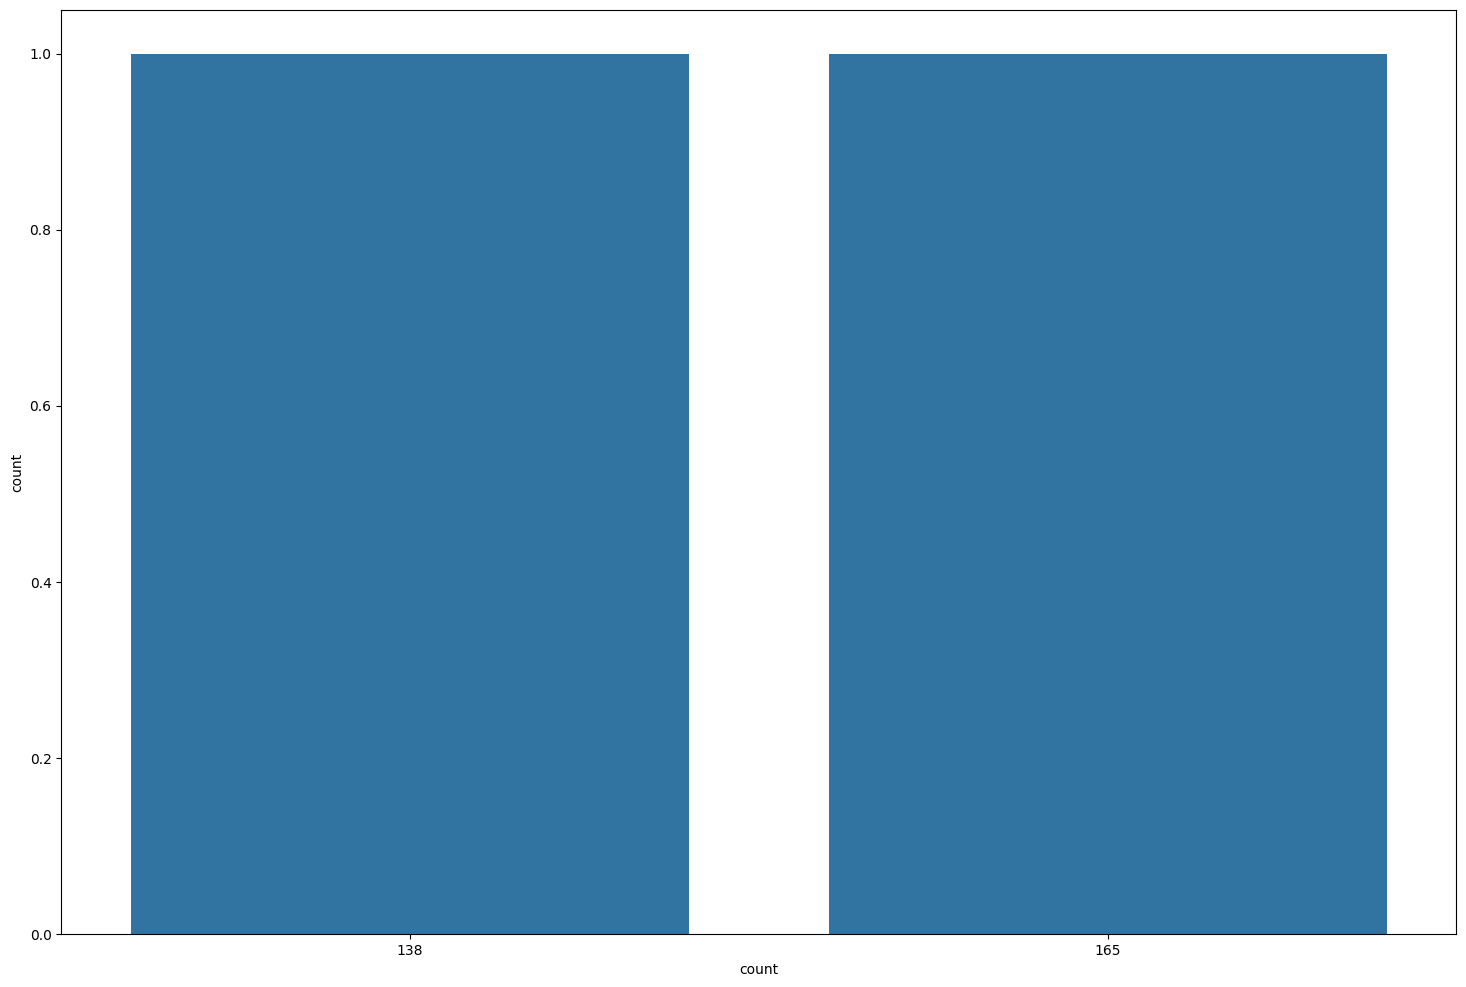

In [ ]:
#data visualization for heart disease patients
y = heart_data["target"]
target_temp = heart_data.target.value_counts()

sns.countplot(x=target_temp)
print(target_temp)

- 1 --> Defective Heart

- 0 --> Healthy Heart

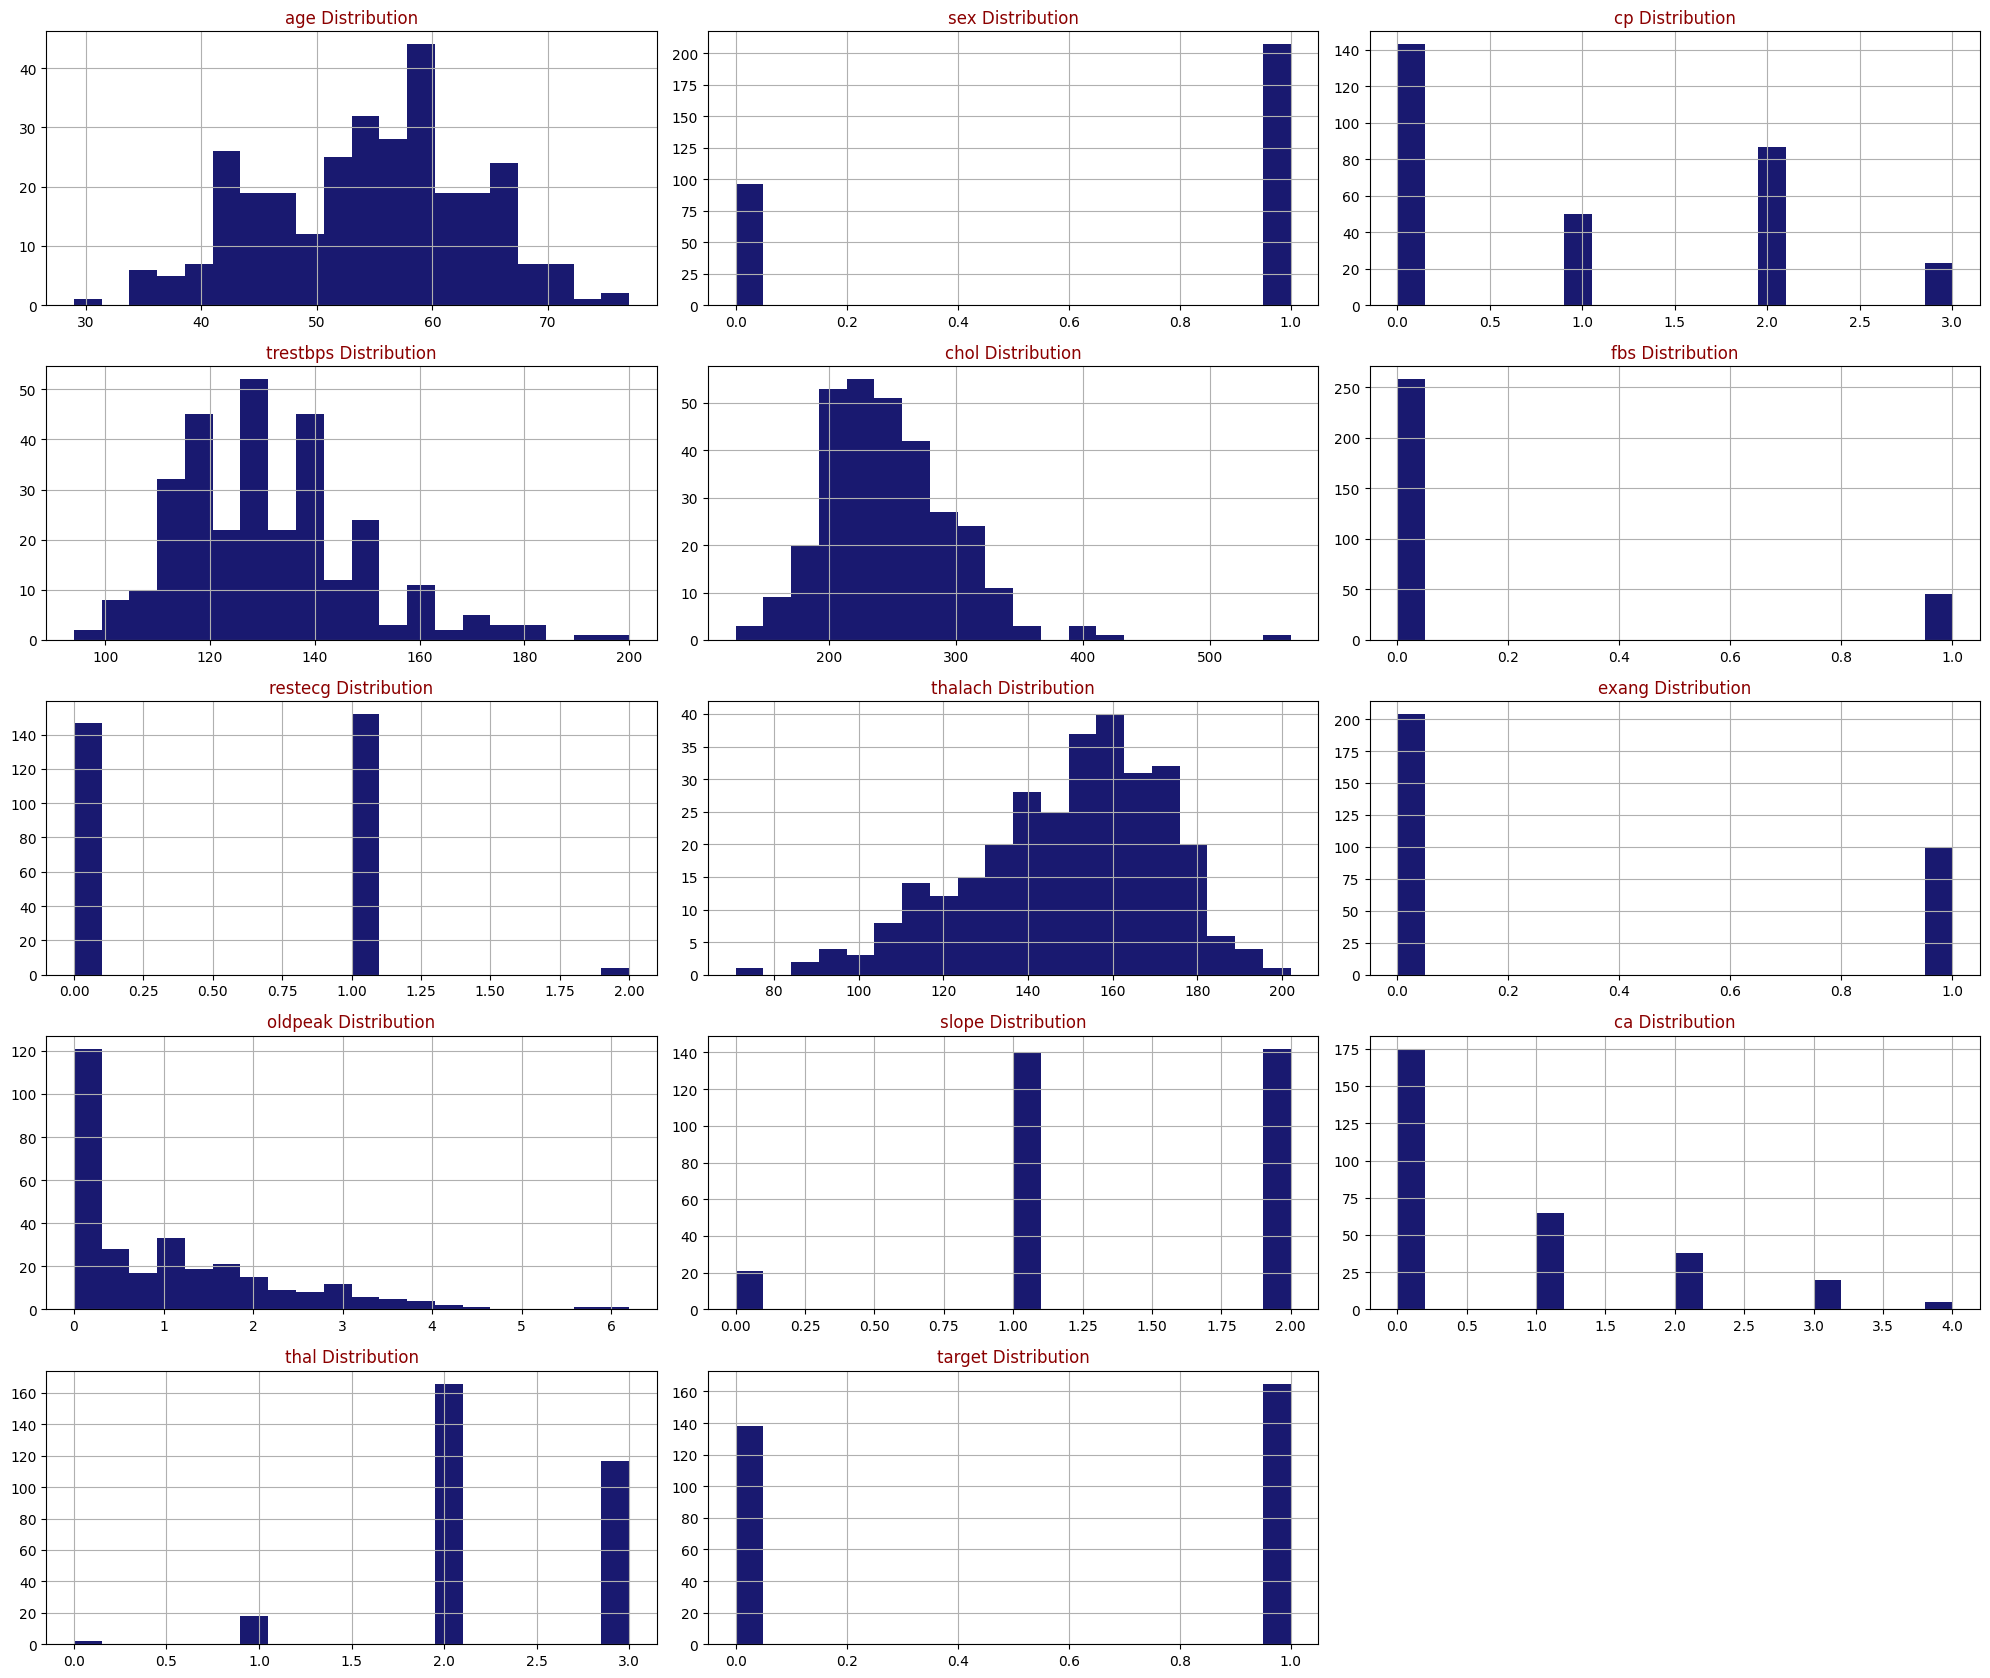

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_data,heart_data.columns,6,3)

## <center> Splitting the Features and Target </center>

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## <center> Splitting the Data into Training data & Test Data </center>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# <center> Model Training </center>

##  Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary output
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [ ]:
# training the LogisticRegression model with Training data
model1 = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model1.fit(X_train,Y_train)

##  Random Forest

In [ ]:

rf=RandomForestClassifier(random_state=100)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)


## <center> Model Evaluation </center>

### Accuracy Score and Classification Report

##  Logistic Regression

In [ ]:
# accuracy on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6033057851239669


In [ ]:
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6229508196721312


In [ ]:
score_lr = round(accuracy_score(X_test_prediction, Y_test)*100,2)
print("The accuracy score achieved using Linear Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Linear Regression is: 62.3 %


In [ ]:
# performance evaluation metrics
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.25      0.78      0.38         9
           1       0.94      0.60      0.73        52

    accuracy                           0.62        61
   macro avg       0.59      0.69      0.55        61
weighted avg       0.84      0.62      0.68        61



## <center> Saving Model </center>


In [ ]:
import pickle

In [ ]:
with open('Heart_lr.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)

print("Model saved to Heart_lr.pkl")


Model saved to Heart_lr.pkl


## Random Forest

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 78.69 %


In [ ]:
# accuracy on train data
rf_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(rf_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [ ]:
# accuracy on test data
rf_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7868852459016393


In [ ]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



## <center> Saving Model </center>


In [ ]:
import pickle

In [ ]:
with open('Heart_rf.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model saved to Heart_rf.pkl")


Model saved to Heart_rf.pkl


## <center> Building a Predictive System </center>



In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


## <center> Saving the trained model </center>